Import the important libraries

In [4]:
!pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 5.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107730 sha256=6147a16030142b1641b55d60d9f77369f9e62038ec000df4b95c4c5ff41f467a
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import eli5 as eli
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [6]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Import the dataset

In [7]:
data = pd.read_csv('/content/gdrive/MyDrive/Projects/Explainable AI/Decision Tree Binary Classifier - ELI5/Social_Network_Ads.csv')
print(data.head())

    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0


Data preparation and preprocessing

In [8]:
data.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [10]:
#split the dataset into independent and dependent variables
X = data.iloc[:, [1, 2, 3]]
y = data.iloc[:,[4]]
print("Independent Variables(Predictors) :\n", X.head(), "\nDependent Variable(Target):\n", y.head())

Independent Variables(Predictors) :
    Gender  Age  EstimatedSalary
0    Male   19            19000
1    Male   35            20000
2  Female   26            43000
3  Female   27            57000
4    Male   19            76000 
Dependent Variable(Target):
    Purchased
0          0
1          0
2          0
3          0
4          0


In [11]:
encoder = LabelEncoder()
X.Gender = encoder.fit_transform(X.Gender)
# Splitting the dataset into the Training set and Test set (75:25)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

<ipython-input-11-98a845ec2caa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.Gender = encoder.fit_transform(X.Gender)


Model Training

In [14]:
# Decision Tree Classifier
classifier_dtc = DecisionTreeClassifier()
classifier_dtc.fit(X_train, y_train)

DecisionTreeClassifier()

Model Testing

In [15]:
# Predicting the Test set results
y_pred = classifier_dtc.predict(X_test)

Model Evaluation

classification report :               precision    recall  f1-score   support

           0       0.95      0.95      0.95        20
           1       0.75      0.75      0.75         4

    accuracy                           0.92        24
   macro avg       0.85      0.85      0.85        24
weighted avg       0.92      0.92      0.92        24



<Axes: >

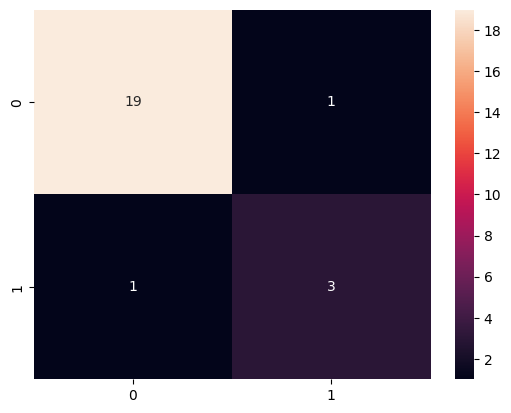

In [16]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

clf_rpt = classification_report(y_test,y_pred)
print("classification report :", clf_rpt)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True)

**Model Interpretation**

explain_weights():  to find the weight given to each feature in prediction. For tree-based models, ELI5 does nothing new for calculating feature weights. It simply uses the GINI index used for preparing decision trees as weights.

In [17]:
eli.explain_weights(classifier_dtc)

Weight,Feature
0.5910,x1
0.4090,x2
0,x0


if we wish to debug and check how the outcome has been predicted for a particular row. We can use explain_prediction().

In [18]:
eli.explain_prediction(classifier_dtc , np.array(X_test)[1])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Explanation(estimator='DecisionTreeClassifier()', description='\nFeatures with largest coefficients.\n\nFeature weights are calculated by following decision paths in trees\nof an ensemble (or a single tree for DecisionTreeClassifier).\nEach node of the tree has an output score, and contribution of a feature\non the decision path is how much the score changes from parent to child.\nWeights of all features sum to the output score or proba of the estimator.\n\nCaveats:\n1. Feature weights just show if the feature contributed positively or\n   negatively to the final score, and does not show how increasing or\n   decreasing the feature value will change the prediction.\n2. In some cases, feature weight can be close to zero for an important feature.\n   For example, in a single tree that computes XOR function, the feature at the\n   top of the tree will have zero weight because expected scores for both\n   branches are equal, so decision at the top feature does not change the\n   expected score. For an ensemble predicting XOR functions it might not be\n   a problem, but it is not reliable if most trees happen to choose the same\n   feature at the top.\n', error=None, method='decision path', is_regression=False, targets=[TargetExplanation(target=0, feature_weights=FeatureWeights(pos=[FeatureWeight(feature='<BIAS>', weight=0.8028169014084507, std=None, value=1.0), FeatureWeight(feature='x1', weight=0.11653793730122664, std=None, value=19.0), FeatureWeight(feature='x2', weight=0.08064516129032262, std=None, value=76000.0)], neg=[], pos_remaining=0, neg_remaining=0), proba=1.0, score=None, weighted_spans=None, heatmap=None)], feature_importances=None, decision_tree=None, highlight_spaces=None, transition_features=None, image=None)

If you further wish to see and compare what combination of features and values lead to a particular prediction, we can use show_prediction().

In [19]:
eli.show_prediction(classifier_dtc, X_test.iloc[1],
                    feature_names=list(X.columns),
                    show_feature_values=True)

In [20]:
eli.show_prediction(classifier_dtc, X_test.iloc[20],
                    feature_names=list(X.columns),
                    show_feature_values=True)